In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [2]:
import os
os.chdir('/mnt/guanabana/raid/home/slomp006')

# Read predictions and vali
validf=pd.read_csv('Input/Change/vali20152018.csv')

# LSTM
LSTM = pd.read_csv('Output/Split/LSTM/LSTM_split.csv')
Dense_LSTM = pd.read_csv('Output/Split/LSTM/Dense/LSTM_dense.csv')

# LSTM-LSTM
LSTM_LSTM = pd.read_csv('Output/Split/LSTM-LSTM/LSTM_LSTM_split.csv')
Dense_LSTM_LSTM = pd.read_csv('Output/Split/LSTM-LSTM/Dense/LSTM_GLWT_dense_split.csv')

# LSTM-Markov
LSTM_Markov2015 = pd.read_csv('Output/Split/Markov/LSTM/LSTMMarkov2015_pred.csv')
LSTM_Markov2015['reference_year'] = 2015
LSTM_Markov2016 = pd.read_csv('Output/Split/Markov/LSTM/LSTMMarkov2016_pred.csv')
LSTM_Markov2016['reference_year'] = 2016
LSTM_Markov2017 = pd.read_csv('Output/Split/Markov/LSTM/LSTMMarkov2017_pred.csv')
LSTM_Markov2017['reference_year'] = 2017
LSTM_Markov2018 = pd.read_csv('Output/Split/Markov/LSTM/LSTMMarkov2018_pred.csv')
LSTM_Markov2018['reference_year'] = 2018
LSTM_Markov = pd.concat([LSTM_Markov2015, LSTM_Markov2016, LSTM_Markov2017, LSTM_Markov2018]).reset_index(drop=True)
LSTM_Markov = LSTM_Markov.sort_values(by=['location_id', 'reference_year'])
Dense_LSTM_Markov = pd.read_csv('Output/Split/Markov/LSTM/Dense/Dense_LSTMMarkov.csv')

# RF
RF_2015 = pd.read_csv('Output/RF/Rob_RFpredict2015_quantiles.csv')
RF_2015['reference_year'] = 2015
RF_2016 = pd.read_csv('Output/RF/Rob_RFpredict2016_quantiles.csv')
RF_2016['reference_year'] = 2016
RF_2017 = pd.read_csv('Output/RF/Rob_RFpredict2017_quantiles.csv')
RF_2017['reference_year'] = 2017
RF_2018 = pd.read_csv('Output/RF/Rob_RFpredict2018_quantiles.csv')
RF_2018['reference_year'] = 2018
RF_2015 = RF_2015.dropna()
RF_2015 = RF_2015.dropna()
RF_2015 = RF_2015.dropna()
RF_2015 = RF_2015.dropna()
common_ids = set(RF_2015['location_id']).intersection(RF_2016['location_id'], RF_2017['location_id'], RF_2018['location_id'])
RF_2015 = RF_2015[RF_2015['location_id'].isin(common_ids)]
RF_2016 = RF_2016[RF_2016['location_id'].isin(common_ids)]
RF_2017 = RF_2017[RF_2017['location_id'].isin(common_ids)]
RF_2018 = RF_2018[RF_2018['location_id'].isin(common_ids)]
RF = pd.concat([RF_2015, RF_2016, RF_2017, RF_2018]).reset_index(drop=True)
RF = RF.sort_values(by=['location_id', 'reference_year'])
Dense_RF = pd.read_csv('Output/RF/Dense/Dense_RF_Preds_Combined.csv')

# RF-LSTM
RF_LSTM = pd.read_csv('Output/Split/RF-LSTM/RF_LSTM_split.csv')
Dense_RF_LSTM = pd.read_csv('Output/Split/RF-LSTM/Dense/RF_GLWT_dense_split.csv')

# RF-Markov
RF_Markov2015 = pd.read_csv('Output/Markov/RF-Markov/RFMarkov2015_pred.csv')
RF_Markov2015['reference_year'] = 2015
RF_Markov2016 = pd.read_csv('Output/Markov/RF-Markov/RFMarkov2016_pred.csv')
RF_Markov2016['reference_year'] = 2016
RF_Markov2017 = pd.read_csv('Output/Markov/RF-Markov/RFMarkov2017_pred.csv')
RF_Markov2017['reference_year'] = 2017
RF_Markov2018 = pd.read_csv('Output/Markov/RF-Markov/RFMarkov2018_pred.csv')
RF_Markov2018['reference_year'] = 2018
RF_Markov = pd.concat([RF_Markov2015, RF_Markov2016, RF_Markov2017, RF_Markov2018]).reset_index(drop=True)
RF_Markov = RF_Markov.sort_values(by=['location_id', 'reference_year'])
Dense_RF_Markov = pd.read_csv('Output/Markov/RF-Markov/Dense/Dense_RFMarkov.csv')

print("Done")

Done


### Create subs of only location id

In [3]:
location_numbid = 1997842

# Vali sub
vali_sub = validf.loc[validf['location_id'] == location_numbid]

# Annual and dense LSTM models
LSTM_sub = LSTM.loc[LSTM['location_id'] == location_numbid]
LSTM_LSTM_sub = LSTM_LSTM.loc[LSTM_LSTM['location_id'] == location_numbid]
LSTM_Markov_sub = LSTM_Markov.loc[LSTM_Markov['location_id'] == location_numbid]
Dense_LSTM_sub = Dense_LSTM.loc[Dense_LSTM['location_id'] == location_numbid]
Dense_LSTM_LSTM_sub = Dense_LSTM_LSTM.loc[Dense_LSTM_LSTM['location_id'] == location_numbid]
Dense_LSTM_Markov_sub = Dense_LSTM_Markov.loc[Dense_LSTM_Markov['location_id'] == location_numbid]

# Annual and dense RF models
RF_sub = RF.loc[RF['location_id'] == location_numbid]
RF_LSTM_sub = RF_LSTM.loc[RF_LSTM['location_id'] == location_numbid]
RF_Markov_sub = RF_Markov.loc[RF_Markov['location_id'] == location_numbid]
Dense_RF_sub = Dense_RF.loc[Dense_RF['location_id'] == location_numbid]
Dense_RF_LSTM_sub = Dense_RF_LSTM.loc[Dense_RF_LSTM['location_id'] == location_numbid]
Dense_RF_Markov_sub = Dense_RF_Markov.loc[Dense_RF_Markov['location_id'] == location_numbid]


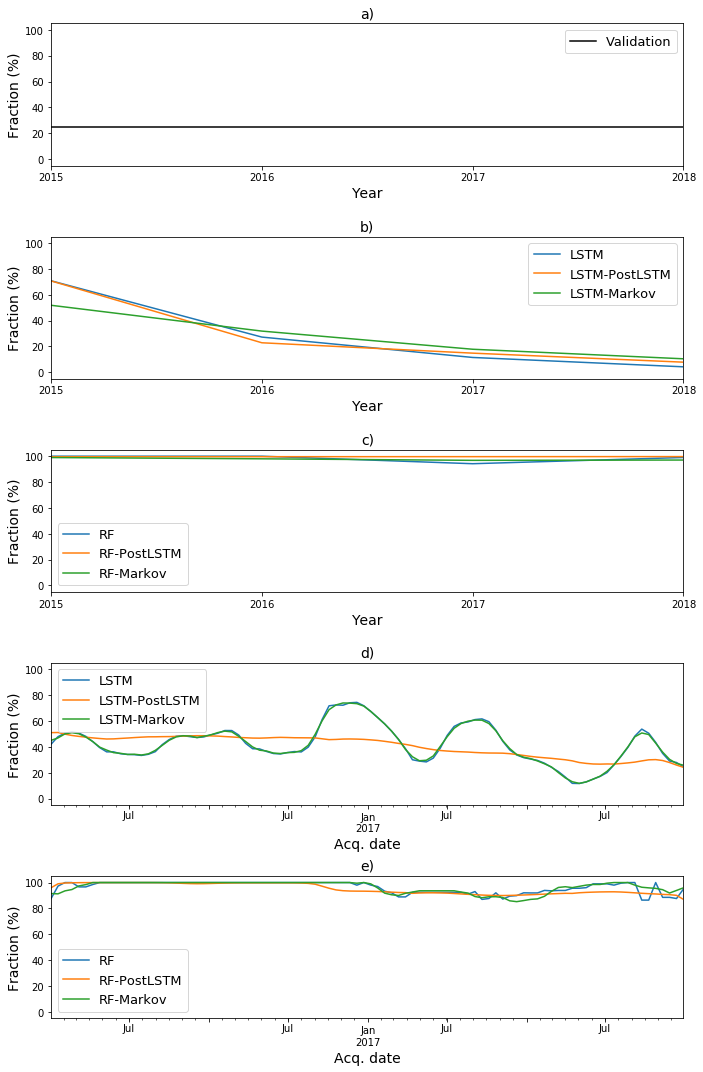

In [4]:
# Class of fraction
classname = "tree"

# Set the index for both datasets
annual_index = LSTM_sub['reference_year'].tolist()
dense_index = Dense_RF_sub['date'].tolist()
dense_index = pd.to_datetime(dense_index)

# Colours
LSTM_col = 'springgreen'
LSTM_LSTM_col = 'darkslategray'
LSTM_Markov_col = 'blueviolet'
RF_col = 'cyan'
RF_LSTM_col = 'blue'
RF_Markov_col = 'green'

# Set up the subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 15))

# Plot validation
vali_sub.index = annual_index
ax1 = vali_sub[classname].plot(ax=ax1, label='Validation', color='black')
ax1.set_xticks(annual_index)
ax1.set_xticklabels(annual_index)

# Add labels and title to the plot
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Fraction (%)', fontsize=14)
ax1.set_title('a)', fontsize=14)
ax1.legend(fontsize=13)

# Plot the annual models
LSTM_sub.index = annual_index
LSTM_LSTM_sub.index = annual_index
LSTM_Markov_sub.index = annual_index
RF_sub.index = annual_index
RF_LSTM_sub.index = annual_index
RF_Markov_sub.index = annual_index

# Annual LSTM models
ax2 = LSTM_sub[classname].plot(ax=ax2, label='LSTM')#, color=LSTM_col)
LSTM_LSTM_sub[classname].plot(ax=ax2, label='LSTM-PostLSTM')#, color=LSTM_LSTM_col)
LSTM_Markov_sub[classname].plot(ax=ax2, label='LSTM-Markov')#, color=LSTM_Markov_col)
ax2.set_xticks(annual_index)
ax2.set_xticklabels(annual_index)

# Add labels and title to the plot
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Fraction (%)', fontsize=14)
ax2.set_title('b)', fontsize=14)
ax2.legend(fontsize=13)

# Annual RF models
ax3 = RF_sub[classname].plot(ax=ax3, label='RF')#, color=RF_col)
RF_LSTM_sub[classname].plot(ax=ax3, label='RF-PostLSTM')#, color=RF_LSTM_col)
RF_Markov_sub[classname].plot(ax=ax3, label='RF-Markov')#, color=RF_Markov_col)
ax3.set_xticks(annual_index)
ax3.set_xticklabels(annual_index)

# Add labels and title to the plot
ax3.set_xlabel('Year', fontsize=14)
ax3.set_ylabel('Fraction (%)', fontsize=14)
ax3.set_title('c)', fontsize=14)
ax3.legend(fontsize=13)

# Plot the dense models
Dense_LSTM_sub.index = dense_index
Dense_LSTM_LSTM_sub.index = dense_index
Dense_LSTM_Markov_sub.index = dense_index
Dense_RF_sub.index = dense_index
Dense_RF_LSTM_sub.index = dense_index
Dense_RF_Markov_sub.index = dense_index

# Dense LSTM models
ax4 = Dense_LSTM_sub[classname].plot(ax=ax4, label='LSTM')#, color=LSTM_col)
Dense_LSTM_LSTM_sub[classname].plot(ax=ax4, label='LSTM-PostLSTM')#, color=LSTM_LSTM_col)
Dense_LSTM_Markov_sub[classname].plot(ax=ax4, label='LSTM-Markov')#, color=LSTM_Markov_col)
ax4.set_xticks(dense_index)

# Add labels and title to the plot
ax4.xaxis.set_major_locator(mdates.AutoDateLocator())
# ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax4.set_xlabel('Acq. date', fontsize=14)
ax4.set_ylabel('Fraction (%)', fontsize=14)
ax4.set_title('d)', fontsize=14)
ax4.legend(fontsize=13)

# Dense RF models
ax5 = Dense_RF_sub[classname].plot(ax=ax5, label='RF')#, color=RF_col)
Dense_RF_LSTM_sub[classname].plot(ax=ax5, label='RF-PostLSTM')#, color=RF_LSTM_col)
Dense_RF_Markov_sub[classname].plot(ax=ax5, label='RF-Markov')#, color=RF_Markov_col)
ax5.set_xticks(dense_index)
# ax2.set_xticklabels(dense_index)

# Add labels and title to the plot
ax5.xaxis.set_major_locator(mdates.AutoDateLocator())
# ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax5.set_xlabel('Acq. date', fontsize=14)
ax5.set_ylabel('Fraction (%)', fontsize=14)
ax5.set_title('e)', fontsize=14)
ax5.legend(fontsize=13)

# adjust the x-axis labels to prevent overlap
# fig.autofmt_xdate(rotation=45, ha='right')
plt.tight_layout()

# adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Set y from 0 to 100
ax1.set_ylim(-5, 105)
ax2.set_ylim(-5, 105)
ax3.set_ylim(-5, 105)
ax4.set_ylim(-5, 105)
ax5.set_ylim(-5, 105)

plt.savefig('Plotting/Output/sample.png')

# Show the plot
plt.show()


#### Plot all classes

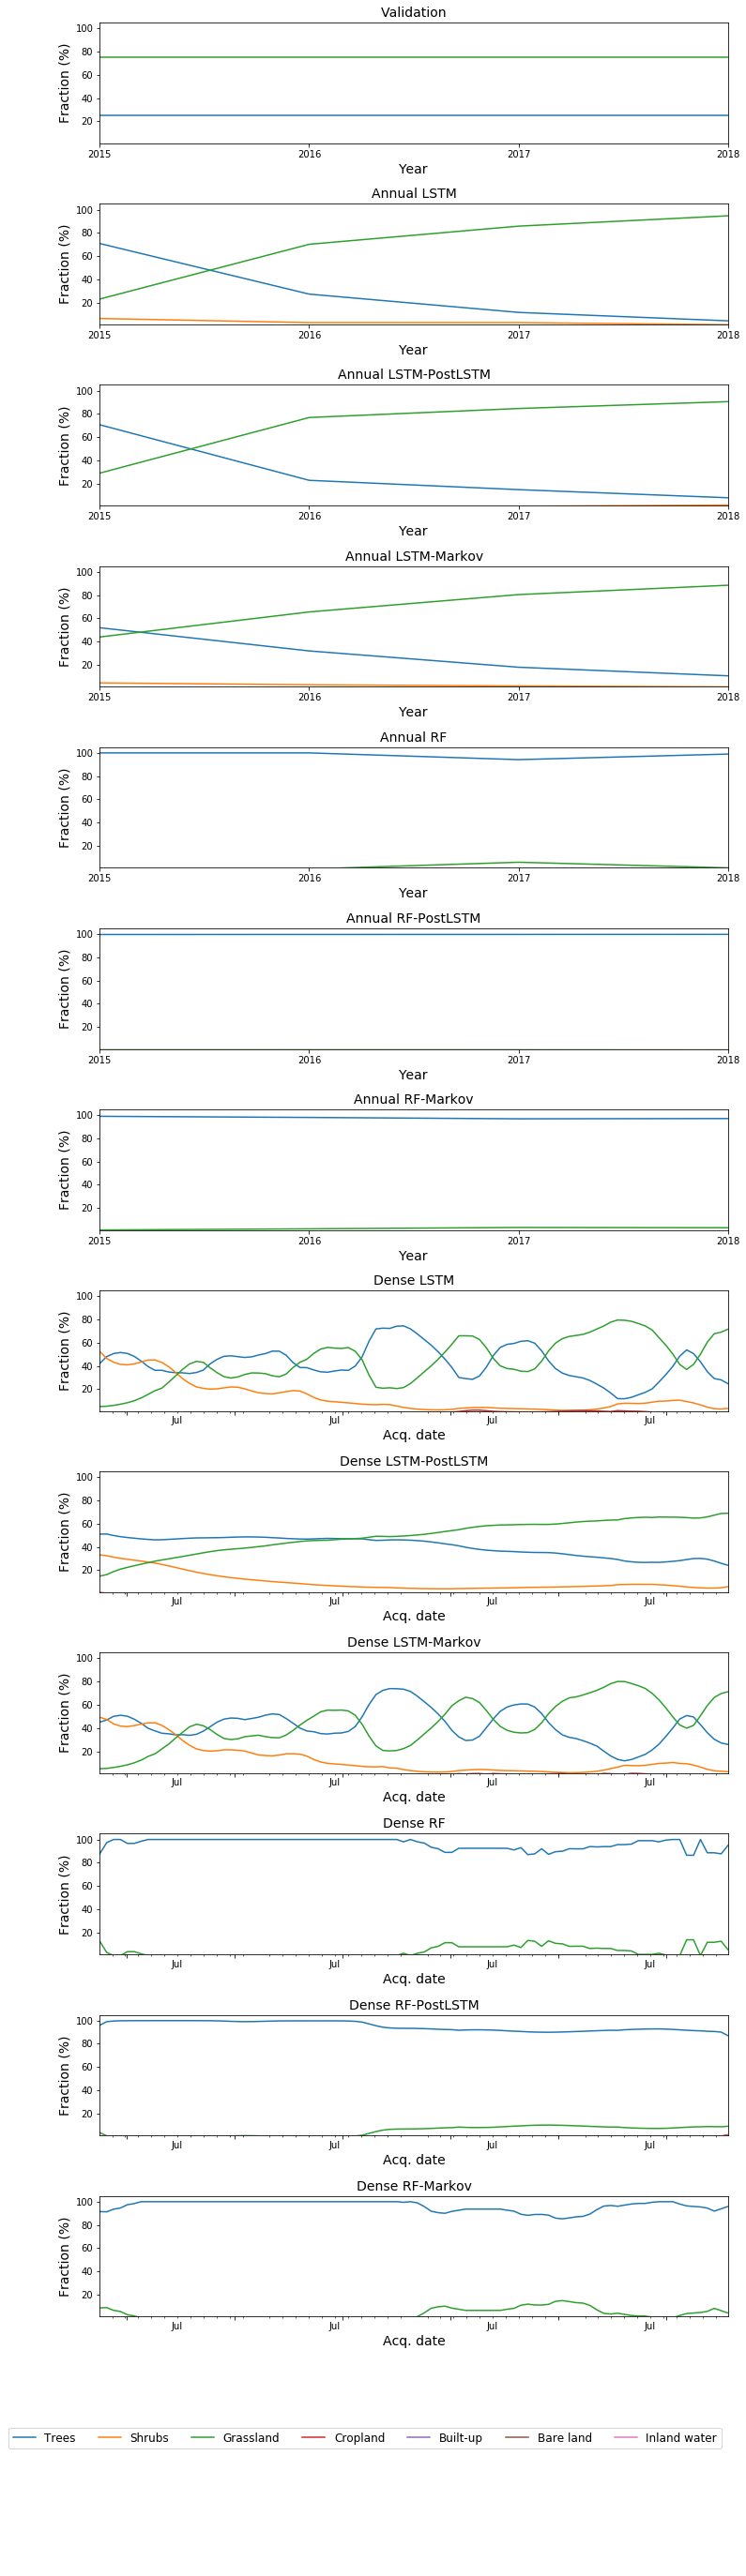

In [7]:
import matplotlib.pyplot as plt

classes = ['tree', 'shrub', 'grassland', 'crops', 'urban_built_up', 'bare', 'water']

# Set up the subplots
fig, axs = plt.subplots(13, 1, figsize=(12, 45))

# Plot validation
vali_sub.index = annual_index
axs[0] = vali_sub[classes].plot(ax=axs[0], label='Validation')
axs[0].set_xticks(annual_index)
axs[0].set_xticklabels(annual_index)
axs[0].set_xlabel('Year', fontsize=14)
axs[0].set_ylabel('Fraction (%)', fontsize=14)
axs[0].set_title('Validation', fontsize=14)

# Plot the annual models
LSTM_sub.index = annual_index
LSTM_LSTM_sub.index = annual_index
LSTM_Markov_sub.index = annual_index
RF_sub.index = annual_index
RF_LSTM_sub.index = annual_index
RF_Markov_sub.index = annual_index

# Annual LSTM models
axs[1] = LSTM_sub[classes].plot(ax=axs[1], label='LSTM')
axs[1].set_xticks(annual_index)
axs[1].set_xticklabels(annual_index)
axs[1].set_xlabel('Year', fontsize=14)
axs[1].set_ylabel('Fraction (%)', fontsize=14)
axs[1].set_title('Annual LSTM', fontsize=14)

axs[2] = LSTM_LSTM_sub[classes].plot(ax=axs[2], label='LSTM-PostLSTM')
axs[2].set_xticks(annual_index)
axs[2].set_xticklabels(annual_index)
axs[2].set_xlabel('Year', fontsize=14)
axs[2].set_ylabel('Fraction (%)', fontsize=14)
axs[2].set_title('Annual LSTM-PostLSTM', fontsize=14)

axs[3] = LSTM_Markov_sub[classes].plot(ax=axs[3], label='LSTM-Markov')
axs[3].set_xticks(annual_index)
axs[3].set_xticklabels(annual_index)
axs[3].set_xlabel('Year', fontsize=14)
axs[3].set_ylabel('Fraction (%)', fontsize=14)
axs[3].set_title('Annual LSTM-Markov', fontsize=14)

# Annual RF models
axs[4] = RF_sub[classes].plot(ax=axs[4], label='RF')
axs[4].set_xticks(annual_index)
axs[4].set_xticklabels(annual_index)
axs[4].set_xlabel('Year', fontsize=14)
axs[4].set_ylabel('Fraction (%)', fontsize=14)
axs[4].set_title('Annual RF', fontsize=14)

axs[5] = RF_LSTM_sub[classes].plot(ax=axs[5], label='RF-PostLSTM')
axs[5].set_xticks(annual_index)
axs[5].set_xticklabels(annual_index)
axs[5].set_xlabel('Year', fontsize=14)
axs[5].set_ylabel('Fraction (%)', fontsize=14)
axs[5].set_title('Annual RF-PostLSTM', fontsize=14)

axs[6] = RF_Markov_sub[classes].plot(ax=axs[6], label='RF-Markov')
axs[6].set_xticks(annual_index)
axs[6].set_xticklabels(annual_index)
axs[6].set_xlabel('Year', fontsize=14)
axs[6].set_ylabel('Fraction (%)', fontsize=14)
axs[6].set_title('Annual RF-Markov', fontsize=14)

# Plot the dense models
Dense_LSTM_sub.index = dense_index
Dense_LSTM_LSTM_sub.index = dense_index
Dense_LSTM_Markov_sub.index = dense_index
Dense_RF_sub.index = dense_index
Dense_RF_LSTM_sub.index = dense_index
Dense_RF_Markov_sub.index = dense_index

# Dense LSTM models
axs[7] = Dense_LSTM_sub[classes].plot(ax=axs[7], label='LSTM')
axs[7].set_xticks(dense_index)
axs[7].xaxis.set_major_locator(plt.MaxNLocator(6))
axs[7].set_xlabel('Acq. date', fontsize=14)
axs[7].set_ylabel('Fraction (%)', fontsize=14)
axs[7].set_title('Dense LSTM', fontsize=14)

axs[8] = Dense_LSTM_LSTM_sub[classes].plot(ax=axs[8], label='LSTM-PostLSTM')
axs[8].set_xticks(dense_index)
axs[8].xaxis.set_major_locator(plt.MaxNLocator(6))
axs[8].set_xlabel('Acq. date', fontsize=14)
axs[8].set_ylabel('Fraction (%)', fontsize=14)
axs[8].set_title('Dense LSTM-PostLSTM', fontsize=14)

axs[9] = Dense_LSTM_Markov_sub[classes].plot(ax=axs[9], label='LSTM-Markov')
axs[9].set_xticks(dense_index)
axs[9].xaxis.set_major_locator(plt.MaxNLocator(6))
axs[9].set_xlabel('Acq. date', fontsize=14)
axs[9].set_ylabel('Fraction (%)', fontsize=14)
axs[9].set_title('Dense LSTM-Markov', fontsize=14)

# Dense RF models
axs[10] = Dense_RF_sub[classes].plot(ax=axs[10], label='RF')
axs[10].set_xticks(dense_index)
axs[10].xaxis.set_major_locator(plt.MaxNLocator(6))
axs[10].set_xlabel('Acq. date', fontsize=14)
axs[10].set_ylabel('Fraction (%)', fontsize=14)
axs[10].set_title('Dense RF', fontsize=14)

axs[11] = Dense_RF_LSTM_sub[classes].plot(ax=axs[11], label='RF-PostLSTM')
axs[11].set_xticks(dense_index)
axs[11].xaxis.set_major_locator(plt.MaxNLocator(6))
axs[11].set_xlabel('Acq. date', fontsize=14)
axs[11].set_ylabel('Fraction (%)', fontsize=14)
axs[11].set_title('Dense RF-PostLSTM', fontsize=14)

axs[12] = Dense_RF_Markov_sub[classes].plot(ax=axs[12], label='RF-Markov')
axs[12].set_xticks(dense_index)
axs[12].xaxis.set_major_locator(plt.MaxNLocator(6))
axs[12].set_xlabel('Acq. date', fontsize=14)
axs[12].set_ylabel('Fraction (%)', fontsize=14)
axs[12].set_title('Dense RF-Markov', fontsize=14)

# Set y from 0 to 100
for ax in axs:
    ax.set_ylim(1, 105)
  
# Remove individual legends
for ax in axs:
    ax.get_legend().remove()
    
# Create a common legend
handles, labels = axs[0].get_legend_handles_labels()
labels = ['Trees', 'Shrubs', 'Grassland', 'Cropland', 'Built-up', 'Bare land', 'Inland water']
fig.legend(handles, labels, loc='lower center', ncol=7, fontsize='large', bbox_to_anchor=(0.45, 0.04))

# adjust the x-axis labels to prevent overlap
plt.setp(axs[-1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Save and display the plot
plt.savefig('Plotting/Output/sample.png')
plt.show()


### Both validation and prediction in one

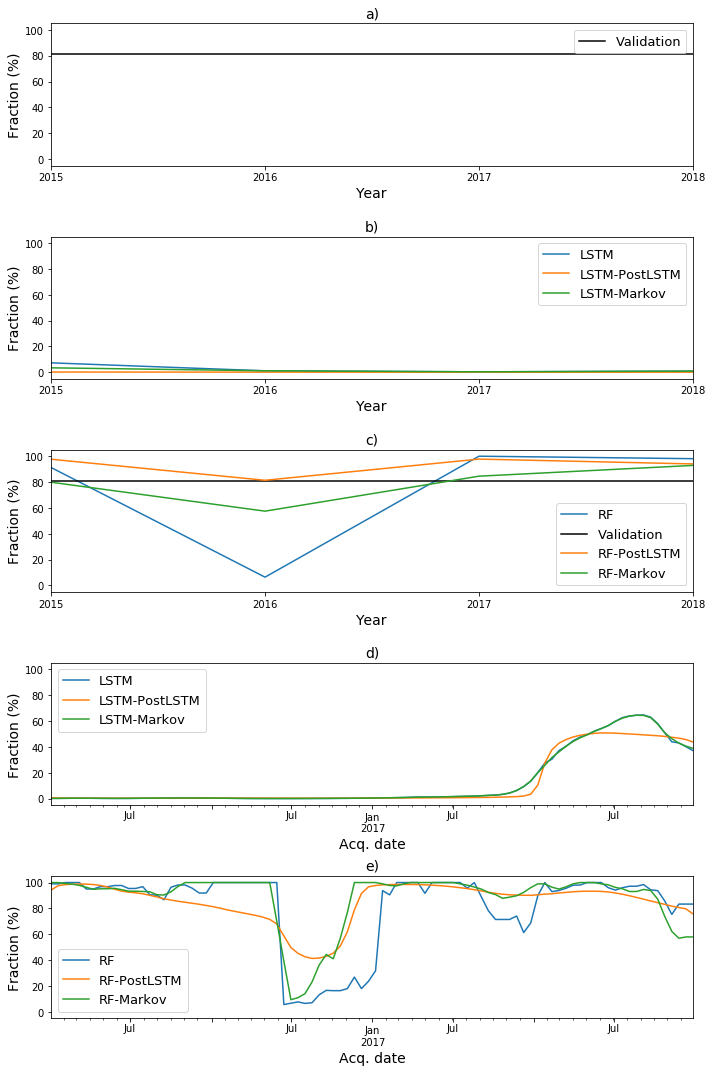

In [10]:
# Class of fraction
classname = "tree"

# Set the index for both datasets
annual_index = LSTM_sub['reference_year'].tolist()
dense_index = Dense_RF_sub['date'].tolist()
dense_index = pd.to_datetime(dense_index)

# Colours
LSTM_col = 'springgreen'
LSTM_LSTM_col = 'darkslategray'
LSTM_Markov_col = 'blueviolet'
RF_col = 'cyan'
RF_LSTM_col = 'blue'
RF_Markov_col = 'green'

# Set up the subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 15))

# Plot validation
vali_sub.index = annual_index
ax1 = vali_sub[classname].plot(ax=ax1, label='Validation', color='black')
ax1.set_xticks(annual_index)
ax1.set_xticklabels(annual_index)

# Add labels and title to the plot
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Fraction (%)', fontsize=14)
ax1.set_title('a)', fontsize=14)
ax1.legend(fontsize=13)

# Plot the annual models
LSTM_sub.index = annual_index
LSTM_LSTM_sub.index = annual_index
LSTM_Markov_sub.index = annual_index
RF_sub.index = annual_index
RF_LSTM_sub.index = annual_index
RF_Markov_sub.index = annual_index

# Annual LSTM models
ax2 = LSTM_sub[classname].plot(ax=ax2, label='LSTM')#, color=LSTM_col)
LSTM_LSTM_sub[classname].plot(ax=ax2, label='LSTM-PostLSTM')#, color=LSTM_LSTM_col)
LSTM_Markov_sub[classname].plot(ax=ax2, label='LSTM-Markov')#, color=LSTM_Markov_col)
ax2.set_xticks(annual_index)
ax2.set_xticklabels(annual_index)

# Add labels and title to the plot
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Fraction (%)', fontsize=14)
ax2.set_title('b)', fontsize=14)
ax2.legend(fontsize=13)

# Annual RF models
ax3 = RF_sub[classname].plot(ax=ax3, label='RF')#, color=RF_col)
vali_sub[classname].plot(ax=ax3, label='Validation', color='black')
RF_LSTM_sub[classname].plot(ax=ax3, label='RF-PostLSTM')#, color=RF_LSTM_col)
RF_Markov_sub[classname].plot(ax=ax3, label='RF-Markov')#, color=RF_Markov_col)
ax3.set_xticks(annual_index)
ax3.set_xticklabels(annual_index)

# Add labels and title to the plot
ax3.set_xlabel('Year', fontsize=14)
ax3.set_ylabel('Fraction (%)', fontsize=14)
ax3.set_title('c)', fontsize=14)
ax3.legend(fontsize=13)

# Plot the dense models
Dense_LSTM_sub.index = dense_index
Dense_LSTM_LSTM_sub.index = dense_index
Dense_LSTM_Markov_sub.index = dense_index
Dense_RF_sub.index = dense_index
Dense_RF_LSTM_sub.index = dense_index
Dense_RF_Markov_sub.index = dense_index

# Dense LSTM models
ax4 = Dense_LSTM_sub[classname].plot(ax=ax4, label='LSTM')#, color=LSTM_col)
Dense_LSTM_LSTM_sub[classname].plot(ax=ax4, label='LSTM-PostLSTM')#, color=LSTM_LSTM_col)
Dense_LSTM_Markov_sub[classname].plot(ax=ax4, label='LSTM-Markov')#, color=LSTM_Markov_col)
ax4.set_xticks(dense_index)

# Add labels and title to the plot
ax4.xaxis.set_major_locator(mdates.AutoDateLocator())
# ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax4.set_xlabel('Acq. date', fontsize=14)
ax4.set_ylabel('Fraction (%)', fontsize=14)
ax4.set_title('d)', fontsize=14)
ax4.legend(fontsize=13)

# Dense RF models
ax5 = Dense_RF_sub[classname].plot(ax=ax5, label='RF')#, color=RF_col)
Dense_RF_LSTM_sub[classname].plot(ax=ax5, label='RF-PostLSTM')#, color=RF_LSTM_col)
Dense_RF_Markov_sub[classname].plot(ax=ax5, label='RF-Markov')#, color=RF_Markov_col)
ax5.set_xticks(dense_index)
# ax2.set_xticklabels(dense_index)

# Add labels and title to the plot
ax5.xaxis.set_major_locator(mdates.AutoDateLocator())
# ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax5.set_xlabel('Acq. date', fontsize=14)
ax5.set_ylabel('Fraction (%)', fontsize=14)
ax5.set_title('e)', fontsize=14)
ax5.legend(fontsize=13)

# adjust the x-axis labels to prevent overlap
# fig.autofmt_xdate(rotation=45, ha='right')
plt.tight_layout()

# adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Set y from 0 to 100
ax1.set_ylim(-5, 105)
ax2.set_ylim(-5, 105)
ax3.set_ylim(-5, 105)
ax4.set_ylim(-5, 105)
ax5.set_ylim(-5, 105)

plt.savefig('Plotting/Output/sample.png')

# Show the plot
plt.show()
